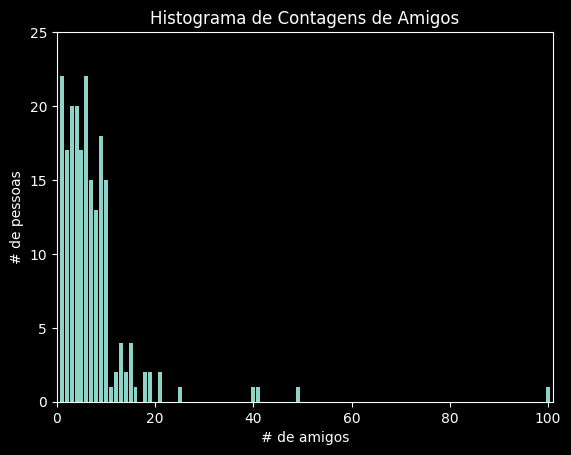

In [8]:
from collections import Counter
from typing import List
import matplotlib.pyplot as plt

num_amigos = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
contagem_amigos = Counter(num_amigos) # Counter({6: 22, 1: 22, 4: 20, 3: 20, ...})
xs = range(101) # O maior valor é o 100.
ys = [contagem_amigos[x] for x in xs] # A altura indica o nº de amigos.

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histograma de Contagens de Amigos")
plt.xlabel("# de amigos")
plt.ylabel("# de pessoas")
# plt.show()

num_pontos = len(num_amigos) # 204
maior_valor = max(num_amigos) # 100
menor_valor = min(num_amigos) # 1

valores_ordenados = sorted(num_amigos)

menor_valor = valores_ordenados[0] # 1
segundo_menor_valor = valores_ordenados[1] # 1
segundo_maior_valor = valores_ordenados[-2] # 49

# Tendências Centrais. 

def media(xs: List[float]) -> float:
    """ Soma de todos os dados dividida pela sua contagem."""
    return sum(xs) / len(xs)

media(num_amigos) # 7.333

# Mediana:
# Corresponde ao valor do meio quando número de pontos de dados é impar. 
# Corresponde à media dos dois valores do meio quando o número de pontos de dados é par.

# Exemplo: 
# x[5 // 2] = [0, 1, '2', 3, 4] = x[2] = A mediana é 2.
# x[6] = [1, 2, '3', '4', 5, 6] = (3 + 4) / 2 = 3.5

def _mediana_impar(xs: List[float]) -> float:
    """Se len(xs) for ímpar, a mediana será o elemento do meio."""
    return sorted(xs)[len(xs) // 2]

def _mediana_par(xs: List[float]) -> float:
    """Se len(xs) for par ele será a média dos dois elementos do meio."""
    xs_ordenado = sorted(xs)
    meio = len(xs) // 2
    # A = [1, 2, '3', '4', '5', '6']
    # len(A) // 2 = 3 = A[3] = 4
    # A[2] + A[3] = 
    #  (3   +  4) /2 = 3.5 
    return (xs_ordenado[meio - 1] + xs_ordenado[meio]) / 2

def mediana(v: List[float]) -> float:
    """Encontra o valor do meio em v"""
    return _mediana_par(v) if len(v) % 2 == 0 else _mediana_impar(v)

assert mediana([1, 10, 2, 9, 5]) == 5
assert mediana([1, 9, 2, 10]) == (2 + 9) / 2

# print(mediana(num_amigos)) # 6 
# http://en.wikipedia.org/wiki/Quickselect Computa mediana de um modo eficiente sem classificar os dados.

# Outliers são dados que se diferenciam muito de todos os outros.
# Média é muito sensível. Usuário mais popular com 200 amigos. 
# Média sobe para 7.82. Mas a mediana permanece a mesma.
# Com outliers inválidos a média pode causar um equívoco.

# QUe exemplo engraçado kkkkkkk:
# Em 1980 o curso de Geografia da Universidade da Carolina do Norte
# tinha a maior médida de salário inicial por causa do Michael Jordan, o astro da NBA(outlier)

def quantil(xs: List[float], p: float) -> float:
    """ Retorna o valor pth-percentile em x."""
    """
        Um valor que separa uma determinada porcentagem dos dados
        (A mediana separa 50% dos dados)
    """
    # print(sorted(num_amigos))
    p_index = int(p * len(xs))
    # print(p_index)
    return sorted(xs)[p_index]

assert quantil(num_amigos, 0.10) == 1
assert quantil(num_amigos, 0.25) == 3
assert quantil(num_amigos, 0.75) == 9
assert quantil(num_amigos, 0.90) == 13

# print(quantil(num_amigos, 0.50))

def moda(x: List[float]) -> List[float]:
    """
        Retorna uma lista, pois pode haver mais de uma moda.
    """
    counts = Counter(x)
    contagem_maxima = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == contagem_maxima]

assert set(moda(num_amigos)) == {1, 6}



In [9]:
import math

# FUnções auxiliares do último capítulo. 
Vetor = List[float]

def produto_escalar(v: Vetor, w: Vetor) -> float:
    assert len(v) == len(w), "vetores tem que ter o mesmo tamanho."
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def soma_dos_quadrados(v: Vetor) -> float:
    return produto_escalar(v, v)
# Dispersão
# A medida da distribuição dos dados.
# Valores próximos a 0 indicam que os dados não estão espalhados.. 
# Valores maiores indicam dados muito espalhados

# Amplitude.
# A diferença entre o maior elemento e o menor

def intervalo_dados(xs: List[float]) -> float:
    return max(xs) - min(xs)
assert intervalo_dados(num_amigos) == 99

# A amplitude só é igual a 0 se os items não estão dispersos.
# Como a mediana, não depende do conjunto de dados como um todo. 

def subtrai_media(xs: List[float]) -> List[float]:
    """Traduz xs subtraindo sua média(para que o resultado tenha média 0)"""
    x_barra = media(xs)
    return [x - x_barra for x in xs]

def variancia(xs: List[float]) -> float:
    """Quase o desvio do quadrado da media.(n - 1)"""
    assert len(xs) >= 2, "A variância precisa de pelo menos 2 elementos."
    n = len(xs)

    desvios = subtrai_media(xs)

    return soma_dos_quadrados(desvios) / (n - 1)

assert 81.54 < variancia(num_amigos) < 81.55
print(variancia(num_amigos))


def desvio_padrao(xs: List[float]) -> float:
    """
    O Desvio Padrão é a raiz quadrada da 
    variância.
    """
    return math.sqrt(variancia(xs))

# assert 9.04 < desvio_padrao(num_amigos)

# Outliers atrapalham a amplitude e o desvio-padrão.

# Alternativa eficiente: Calcula o valor do 75º percentil e o valor do 25º percentil.

def intervalo_interquartil(xs: List[float]) -> float:
    """ Retorna a diferenã entre o percentil 75% e o percentil 25%"""
    return quantil(xs, 0.75) - quantil(xs, 0.25)

assert intervalo_interquartil(num_amigos) == 6



81.54351395730716


In [39]:
#  Funções Auxiliares.
def produto_escalar(v: Vetor, w: Vetor) -> float:
    """Calcula v_1 * w_1 + v_2 * w_2 + ... + v_n * w_n"""
    assert len(v) == len(w), "vetores tem que ter o mesmo tamanho."
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def multiplicar_por_escalar(c: float, v: Vetor) -> Vetor:
    """Multiplica cada elemento por c."""
    return [c * v_i for v_i in v]
# Correlação

# Hipótese: O tempo que as pessoas passam no site está relacionado ao número de amigos. 

# minutos_diarios: Uma lista de quantos minutos cada usuário para por dia na rede social.
minutos_diarios = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
horas_diarias = [dm / 60 for dm in minutos_diarios]

# Covariância: 
# A variância mede o desvio de uma variável da média. 
# Já a covariância mede a variação simultânea de duas variáveis em relação às suas médias.

def covariancia(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs e ys tem de ter o mesmo número de elementos."
    return produto_escalar(subtrai_media(xs), subtrai_media(ys)) / (len(xs) - 1)
assert 22.42 < covariancia(num_amigos, minutos_diarios) < 22.43

print(covariancia(num_amigos, minutos_diarios)) # 22.42
# Se o xs e o ys estão juntos acima ou abaixo da média,
# a covariância vai ser positiva.
# Agora se um está acima e o outro está abaixo da média
# a covariância vai ser negativa. 

# Logo: Uma covariância positiva alta indica que x
# tende a ser alto quando y é alto e baixo quando y baixo.

# Já uma covariância negativa alta indica x tende a ser baixo
# quando y é alto, e alto quando y é baixo.

# Covariância próxima de 0 indica que essa relação não existe.

# Dificuldades de Interpretação: 
# Unidade estranha: amigo-minutos-por-dia.
# Se cada usuário tivesse o dobro de amigos mas o mesmo número de minutos
# a covariância seria duas vezes maior.
# Exemplo: 
num_amigos_2x = multiplicar_por_escalar(2, num_amigos)
# print(covariancia(num_amigos_2x, minutos_diarios)) 
assert 44.85 < covariancia(num_amigos_2x, minutos_diarios) < 44.86
# Mas na prática as variáveis estariam tão inter-relacionadas
# quanto antes. Então é difícil definir uma covariância alta.

# Por isso é cpmum calcular a correlação: 
# Ela divide os desvios-padrão das duas variáveis. 
def correlacao(xs: List[float], ys: List[float]) -> float:
    """Mede a variação simultânea de xs e ys a partir das suas médias."""
    desvio_padrao_x = desvio_padrao(xs)
    desvio_padrao_y = desvio_padrao(ys)
    if desvio_padrao_x > 0 and desvio_padrao_y > 0:
        return covariancia(xs, ys) / desvio_padrao_x / desvio_padrao_y # Como eu divido aqui a correlação não tem unidade. 
    # Ela sempre fica entre -1(anticorrelação perfeita) e 1(correlação perfeita.)
    else: 
        return 0 # Se não houve variação, então a correlação é 0. Faz sentido
                 # Se uma delas não variou em nada, então obviamente ela não tem nada haver com a outra.
assert 0.24 < correlacao(num_amigos, minutos_diarios) < 0.25
assert 0.24 < correlacao(num_amigos, horas_diarias) < 0.25

# print(correlacao(num_amigos_2x, minutos_diarios)) # Mesmo valor, como divide ele sempre fica proporcional.

outlier = num_amigos.index(100) # Índice de outlier. O cara tem 100 amigos e passa só um minuto por dia no site.
num_amigos_bom = [
    x 
    for i, x in enumerate(num_amigos)
    if i != outlier # mata o outlier.
]
print(outlier)
# for i, x in enumerate(num_amigos):
#     print(i, x)

minutos_diarios_bom = [
    x 
    for i, x in enumerate(minutos_diarios)
    if i != outlier
]

horas_diarias_boas = [dm / 60 for dm in minutos_diarios_bom]

assert 0.57 < correlacao(num_amigos_bom, minutos_diarios_bom) < 0.58
assert 0.57 < correlacao(num_amigos_bom, horas_diarias_boas) < 0.58

print(correlacao(num_amigos_bom, minutos_diarios_bom)) # A correlação aumenta bastante quando retiramos o outlier.

22.425435139573064
0
0.5736792115665573
